In [95]:
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
from matplotlib.widgets import RangeSlider
%matplotlib widget
#import plotly.graph_objects as go
#import plotly.express as px
import numpy as np
from ast import literal_eval

In [81]:
log = pd.read_csv('dataframe_output.csv',index_col=0)

In [82]:
log.head()

,Time,Instruction,Output Channel,Page,Channel No
0,2,memri,"[[0], [], [], [], [0, 0, 140542116033568, 3200...",1,-1
1,4,regwi,"[[0], [], [], [], [0, 0, 140542116033568, 3200...",1,-1
2,6,regwi,"[[0], [], [], [], [0, 0, 140542116033568, 3200...",1,-1
3,8,regwi,"[[0], [], [], [], [0, 0, 140542116033568, 3200...",1,-1
4,10,bitwi,"[[0], [], [], [], [0, 0, 140542116033568, 3200...",1,-1


In [98]:
literal_eval(log["Output Channel"][1])

[[0],
 [],
 [],
 [],
 [0, 0, 140542116033568, 32000, 1],
 [0, 0, 140542116033568, 32000, 1],
 [0, 0, 140542116033568, 32000, 1],
 [0, 0, 140542116033568, 32000, 1]]

In [117]:
Times = np.array(log['Time'])
Output_channel = np.array(log['Output Channel'])
Instructions = np.array(log['Instruction'])
Page = np.array(log['Page'])
Channels = np.array(log['Channel No'])
levels = []
lengths = []
for i,output in enumerate(Output_channel):
    Output_channel[i] = literal_eval(output)
for i,channel in enumerate(Channels):
    if channel != -1:
        levels.append(channel+12)
        if len(Output_channel[i][channel]) == 5:
            lengths.append(int(format(Output_channel[i][channel][3],"b"))&0b111111111111)
        else:
            lengths.append(0)
            #print(max(Output_channel[i][channel])&0b1111111111111111)
    else:
        lengths.append(0)
        levels.append(Page[i])
    #else:
        #levels.append(channel+12)

/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  This is separate from the ipykernel package so we can avoid doing imports until


[ -20 4330]
4330


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
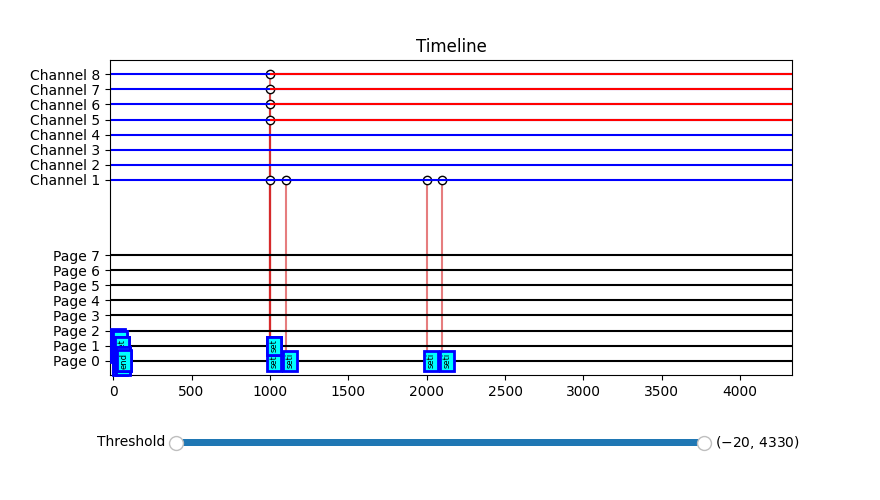

In [122]:
fig, ax = plt.subplots(figsize=(8.8, 5), constrained_layout=True)
ax.set(title="Timeline")
plt.subplots_adjust(bottom=0.25)
#levels = np.tile([-5, 5, -3, 3, -1, 1],
#                 int(np.ceil(len(Times)/6)))[:len(Times)]



ax.vlines(Times, Page, levels, color="tab:red",alpha=0.6)  # The vertical stems.
ax.plot(Times, Page,ls='',
        color="k")  # Baseline and markers on it.

for i,level in enumerate(levels):
    if level >=12:
        ax.plot(Times[i],levels[i],marker='o',color='k',markerfacecolor='w')

for i in range(8):
    ax.hlines(i,-20,max(Times+lengths)+2,color='k')
    
for i in range(12,20):
    ax.hlines(i,-20,max(Times+lengths)+2,color='b')
    
for i,out in enumerate(lengths):
    if out > 0:
        ax.hlines(levels[i]+Page[i]-1,Times[i],Times[i]+out,color="red")

# annotate lines
for d, l, r in zip(Times, Page, Instructions):
    ax.annotate(r, xy=(d, l),
               bbox=dict(boxstyle="square,pad=0.3", fc="cyan", ec="b", lw=2),
                verticalalignment='center',
               rotation=90,size=6)
slider_ax = plt.axes([0.20, 0.1, 0.60, 0.03])
slider = RangeSlider(slider_ax, "Threshold", -20, max(Times+lengths)+2,valinit=(-20,max(Times+lengths)+2))
print(slider.val)
print(slider.val[1])
ax.set_xlim(slider.val[0],slider.val[1])

def update(val):
    # The val passed to a callback by the RangeSlider will
    # be a tuple of (min, max)
    # Update the position of the vertical lines
    ax.set_xlim(slider.val[0],slider.val[1])

    # Redraw the figure to ensure it updates
    ax.canvas.draw_idle()

#plt.xscale('log')
#ax.yaxis.set_visible(False)
ticks = [0,1,2,3,4,5,6,7,12,13,14,15,16,17,18,19]
dic = {0:'Page 0',1:'Page 1',2:'Page 2',3:'Page 3',4:'Page 4',5:'Page 5',6:'Page 6',7:'Page 7',
      12:'Channel 1',13:'Channel 2',14:'Channel 3',15:'Channel 4',16:'Channel 5',17:'Channel 6',
      18:'Channel 7',19:'Channel 8'}
labels = [ticks[i] if t not in dic.keys() else dic[t] for i,t in enumerate(ticks)]
ax.set_yticks(ticks)
ax.set_yticklabels(labels)
plt.xlabel("Time Step")
slider.on_changed(update)
plt.show()

In [55]:
"01_phase_calibration.asm"[-4:]

'asm'